<a href="https://colab.research.google.com/github/jiyanshud22/Affective-Computing/blob/main/Copy_of_mth686_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MTH686 Project Report (Dataset: set-36)**

## *Jiyanshu Dhaka* *(220481)*

# Question 1: Find the least squares estimators of the unknown parameters under three different model assumptions.

- For Model 1 (Exponential sum), where $y(t) = \alpha_0 + \alpha_1e^{\beta_1t} + \alpha_2e^{\beta_2t} + \epsilon(t)$, I estimated the parameters $\mathbf{\hat{p1}} = [\hat{\alpha}_0, \hat{\alpha}_1, \hat{\alpha}_2, \hat{\beta}_1, \hat{\beta}_2]$ using multi-start nonlinear least squares.
- For Model 2 (Rational), where $y(t) = \frac{\alpha_0 + \alpha_1t}{\beta_0 + \beta_1t} + \epsilon(t)$, I estimated the parameters $\mathbf{\hat{p2}} = [\hat{\alpha}_0, \hat{\alpha}_1, \hat{\beta}_0, \hat{\beta}_1]$ using multi-start nonlinear least squares.
- For Model 3 (Quartic polynomial), where $y(t) = \beta_0 + \beta_1t + \beta_2t^2 + \beta_3t^3 + \beta_4t^4 + \epsilon(t)$, I estimated the parameters $\mathbf{\hat{\beta}3} = [\hat{\beta}_0, \hat{\beta}_1, \hat{\beta}_2, \hat{\beta}_3, \hat{\beta}_4]$ using linear least squares.

The estimated parameters for each model are:

1.1 Model 1
The least square estimators were

$\begin{pmatrix} \hat{\alpha}_0 \\ \hat{\alpha}_1 \\ \hat{\alpha}_2 \\ \hat{\beta}_1 \\ \hat{\beta}_2 \end{pmatrix} = \begin{pmatrix} 1.58236376 \times 10^0 \\ -1.90699608 \times 10^2 \\ 1.89376947 \times 10^2 \\ -7.29741066 \times 10^{-2} \\ -7.25711914 \times 10^{-2} \end{pmatrix}$



1.2 Model 2
The least square estimators were

$\begin{pmatrix} \hat{\alpha}_0 \\ \hat{\alpha}_1 \\ \hat{\beta}_0 \\ \hat{\beta}_1 \end{pmatrix} = \begin{pmatrix} -0.04316538 \\ 0.29993599 \\ 0.54456472 \\ 0.16833935 \end{pmatrix}$



1.3 Model 3
The least square estimators were

$\begin{pmatrix} \hat{\beta}_0 \\ \hat{\beta}_1 \\ \hat{\beta}_2 \\ \hat{\beta}_3 \\ \hat{\beta}_4 \end{pmatrix} = \begin{pmatrix} 3.38014418 \times 10^{-1} \\ 1.35180401 \times 10^{-1} \\ -4.59909443 \times 10^{-3} \\ 6.31952179 \times 10^{-5} \\ -3.03487991 \times 10^{-7} \end{pmatrix}$

--------

# Question 2: How did you find the least squares estimators? What kind of initial guesses you have chosen?

# 2.1 Estimation Methodology

--------

## Model 1 (Exponential Sum)

For Model 1,
$$
y(t)=\alpha_0+\alpha_1 e^{\beta_1 t}+\alpha_2 e^{\beta_2 t}+\varepsilon(t),
$$
parameters are obtained by **nonlinear least squares**. I used the Osborne algorithm: alternate between

1) fixing $(\beta_1,\beta_2)$ and updating $(\alpha_0,\alpha_1,\alpha_2)$ by linear least squares on the transformed response, and  
2) updating $(\beta_1,\beta_2)$ using a Gauss–Newton–style step that reduces the residual sum of squares (RSS).

Compared with a plain Gauss–Newton fit, Osborne gave a lower RSS on this dataset, so I report its solution.

--------

## Model 2 (Rational Function)

For Model 2,
$$
y(t)=\frac{\alpha_0+\alpha_1 t}{\beta_0+\beta_1 t}+\varepsilon(t),
$$
I used an **alternating optimization**: given $(\beta_0,\beta_1)$, estimate $(\alpha_0,\alpha_1)$ by simple linear regression; holding $(\alpha_0,\alpha_1)$ fixed, update $(\beta_0,\beta_1)$ by a Gauss–Newton step (with a stable central-difference Jacobian). Iterating these two substeps yields an approximate least-squares solution.

--------

## Model 3 (Quartic Polynomial)

Model 3 is linear in parameters:
$$
y(t)=\beta_0+\beta_1 t+\beta_2 t^2+\beta_3 t^3+\beta_4 t^4+\varepsilon(t).
$$

Let
$$
\mathbf X=
\begin{pmatrix}
1 & t_1 & t_1^{2} & t_1^{3} & t_1^{4} \\
1 & t_2 & t_2^{2} & t_2^{3} & t_2^{4} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & t_n & t_n^{2} & t_n^{3} & t_n^{4}
\end{pmatrix},
\qquad
\mathbf y=
\begin{pmatrix}
y_{1}\\ y_{2}\\ \vdots\\ y_{n}
\end{pmatrix},
\qquad
\boldsymbol{\beta}=
\begin{pmatrix}
\beta_0\\ \beta_1\\ \beta_2\\ \beta_3\\ \beta_4
\end{pmatrix}.
$$

The least-squares estimator solves the normal equations
$$
\mathbf X^\top \mathbf X\,\hat{\boldsymbol{\beta}}=\mathbf X^\top \mathbf y
\quad\Rightarrow\quad
\hat{\boldsymbol{\beta}}=(\mathbf X^\top \mathbf X)^{-1}\mathbf X^\top \mathbf y.
$$


--------

#2.2 Initial Guesses for the models

--------

## Model 1

For Model 1, where $y(t) = \alpha_0 + \alpha_1 e^{\beta_1 t} + \alpha_2 e^{\beta_2 t} + \epsilon(t)$, good starting values are important for the iterative solver. I set
$$
\alpha_0 \approx y(n),
$$
and, if needed for numerical stability, I add a small constant such as $10^{-3}$. With this, I define
$$
z(t) = y(t) - \alpha_0.
$$
To initialize $\beta_1$ and $\beta_2$ (when exponential growth/decay is expected), I focus on the region where $z(t) > 0$, split the data at the median of $t$, and run two quick regressions of $\log z(t)$ on $t$ (one per split). I take the two slopes as initial values for $\beta_1$ and $\beta_2$. I impose an ordering such as $\beta_1 < \beta_2$ to keep the two exponentials distinct and numerically stable. Given $(\beta_1,\beta_2)$, I initialize $(\alpha_1,\alpha_2)$ by least squares on $z(t)$.

--------

## Model 2

For Model 2,
$$
y(t) = \frac{\alpha_0 + \alpha_1 t}{\beta_0 + \beta_1 t} + \epsilon(t),
$$
I use the asymptotic behavior as a guide: as $t$ increases, $y(t) \to \alpha_1 / \beta_1$. I approximate this limit by
$$
L \approx y(n) + 0.01.
$$
This yields the working relation
$$
\frac{\alpha_0 + \alpha_1 t}{\beta_0 + \beta_1 t} - L \approx \epsilon(t),
$$
and, after multiplying by $(\beta_0 + \beta_1 t)$,
$$
(\alpha_0 - L \beta_0) + (\alpha_1 - L \beta_1) t \approx \epsilon(t)\,(\beta_0 + \beta_1 t).
$$
Since this is awkward to use directly, I apply a simple transform. Starting from
$$
y(t)\,(\beta_0 + \beta_1 t) = \alpha_0 + \alpha_1 t,
$$
I consider the approximation
$$
y(t) - L \approx \kappa(t)\,(\beta_0 + \beta_1 t)^{-1}, \quad \kappa(t) = \kappa_0 + \kappa_1 t.
$$
Linearizing gives
$$
\frac{1}{y(t) - L} \approx \eta_0 + \eta_1 t,
$$
which I fit by ordinary least squares to obtain $\widehat{\eta}_0, \widehat{\eta}_1$. For an identifiable starting point, I temporarily set $\beta_0 = 1$ and define
$$
\widehat{\beta}_1 = \frac{\widehat{\eta}_1}{\widehat{\eta}_0}, \qquad
\widehat{\alpha}_1 = L \,\widehat{\beta}_1 \,\frac{\widehat{\eta}_1}{\widehat{\eta}_0}, \qquad
\widehat{\alpha}_0 = L + \frac{1}{\widehat{\eta}_0}.
$$
I then refine these seeds with Gauss-Newton in the full nonlinear fit, without fixing $\beta_0$ during estimation.

--------

## Model 3

For the quartic model, no initial guesses are required because it is linear in the coefficients. I solve the normal equations to obtain the least-squares estimates.


In [9]:
import os
from google.colab import drive
import ipykernel

# Mount Google Drive to save the HTML file (optional, but good for persistence)
# drive.mount('/content/drive')

# Dynamically get the current notebook's filename
# The user specified the notebook name as 'report.ipynb'
notebook_name = 'report.ipynb'
output_html_name = notebook_name.replace('.ipynb', '.html')

# Convert the notebook to HTML using nbconvert
# The ! prefix runs a shell command
# Adding --TagRemovePreprocessor.remove_input_code=true to hide code for a cleaner report (optional)
!jupyter nbconvert --to html "{notebook_name}" --output "{output_html_name}"

print(f"'{output_html_name}' has been generated in the current directory. You can download it from the file browser on the left.")

# If you want to save it to Google Drive, uncomment and adjust the path below:
# !mv "{output_html_name}" "/content/drive/MyDrive/{output_html_name}"
# print(f"'{output_html_name}' has also been moved to your Google Drive.")

[NbConvertApp] Converting notebook report.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 914179 bytes to report.html
'report.html' has been generated in the current directory. You can download it from the file browser on the left.


**Initial guesses for Model 1 (Exponential sum):**

Parameters: `[α0, α1, α2, β1, β2]`

The first five sets of initial guesses for Model 1 are:

*   `[1.7013, -0.9209, -1.8361, -0.0967, 0.0627]`
*   `[2.3081, 0.4265, 0.9180, 0.0087, 0.0870]`
*   `[2.0949, -1.9890, 1.4296, -0.0933, 0.0459]`
*   `[0.6864, 1.4527, 0.1658, -0.0401, -0.0155]`
*   `[0.3623, -1.5029, 0.6825, 0.0294, 0.0231]`

**Initial guesses for Model 2 (Rational) with $\beta_0=1$:**

Parameters: `[α0, α1, β1]`

The first five sets of initial guesses for Model 2 are:

*   `[2.1261, 1.4809, 0.1985]`
*   `[4.7447, 0.8402, 0.1273]`
*   `[2.4871, 1.1172, 0.1357]`
*   `[2.0733, 1.9379, 0.1133]`
*   `[4.6603, -0.5403, 0.1187]`

--------

## Question 3: Find the 'best' fitted model

To determine the 'best' fitted model among the three, I will compare them using various metrics including SSE, R-squared, AIC, and BIC.

### Comparison Criteria

#### Sum of Squared Errors (SSE)
The **Sum of Squared Errors (SSE)** measures the total deviation of the observed values from the predicted values of the model. A lower SSE generally indicates a better fit to the observed data.
$$\text{SSE} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

#### R-squared ($R^2$)
**R-squared ($R^2$)** represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). A higher $R^2$ value, closer to 1, suggests that the model explains a larger portion of the variability in the response variable, thus indicating a better fit.
$$\text{SST} = \sum_{i=1}^{n} (y_i - \bar{y})^2$$
$$R^2 = 1 - \frac{\text{SSE}}{\text{SST}}$$

#### Akaike Information Criterion (AIC)

I can compare the models using AIC, where:

$$\text{AIC} = 2k - 2 \log(\hat{L})$$

Here, $k$ is the number of parameters, and $\hat{L}$ is the maximum likelihood. Given that I have Gaussian noise, I have:

$$-2 \log(\hat{L}) = \log(2\pi) + n + \log(\hat{\sigma}^2_{\text{MLE}})$$

Thus, the AIC can be expressed as:

$$\text{AIC} = \log(2\pi) + n + 2k + \log(\hat{\sigma}^2_{\text{MLE}})$$

#### Bayesian Information Criterion (BIC)

I can compare the models using BIC, where:

$$\text{BIC} = k \log(n) - 2 \log(\hat{L})$$

Here, $n$ is the number of data points. Given that I have Gaussian noise, I have:

$$-2 \log(\hat{L}) = \log(2\pi) + n + \log(\hat{\sigma}^2_{\text{MLE}})$$

Thus, the BIC can be expressed as:

$$\text{BIC} = \log(2\pi) + n + k \log(n) + \log(\hat{\sigma}^2_{\text{MLE}})$$



Model Comparison Metrics:


,Model,k,SSE,R^2,AIC,BIC
0,Exp-sum (M1),5,4.842731,0.521091,-195.500691,-183.913250
1,Rational (M2),4,5.406968,0.465292,-189.234977,-179.965025
2,Quartic poly (M3),5,4.751970,0.530067,-196.919663,-185.332222


## Conclusion

- **SSE** is lowest for **Quartic poly (M3)** (4.752 < 4.843 < 5.407) ⇒ best raw fit.  
- **\(R^2\)** is highest for **M3** (0.530 > 0.521 > 0.465) ⇒ explains most variance.  
- **AIC** is lowest for **M3** (−196.92 < −195.50 < −189.23) ⇒ best trade-off fit vs. parameters.  
- **BIC** is lowest for **M3** (−185.33 < −183.91 < −179.97) ⇒ also best under stronger complexity penalty.

**Decision:** I select **Model 3** as the best-fitted model.

--------

## Question 4: Find the estimate of σ^2.

The estimate of the error variance ($\sigma^2$) for each model is calculated as the Sum of Squared Errors (SSE) divided by the degrees of freedom, which is the number of data points ($n$) minus the number of parameters ($k$) in the model.

$\hat{\sigma}^2 = \frac{SSE}{n-k}$



Estimated sigma^2 for Model 1 (Exp-sum): 0.06918
Estimated sigma^2 for Model 2 (Rational): 0.07615
Estimated sigma^2 for Model 3 (Quartic polynomial): 0.06789


###  $\hat{\sigma}^2\$ values:

The estimated error variances are
$$
\hat{\sigma}^2_{\mathrm{M1}} = 0.06918,\quad
\hat{\sigma}^2_{\mathrm{M2}} = 0.07615,\quad
\hat{\sigma}^2_{\mathrm{M3}} = 0.06789.
$$

Since a smaller  $\hat{\sigma}^2\$ indicates less unexplained variability, **Model 3 (quartic polynomial)** has the tightest residual spread among the three. This is consistent with the AIC/BIC and \(R^2\) comparisons, so I prefer **Model 3** for this dataset.


--------

## Question 5: Find the associated confidence intervals based on the Fisher information matrix.

CI for parameters are derived from estimated covariance matrix of estimators. For linear models, this is exact; for nonlinear models, it's approximated based on the Jacobian.

For a model $y(t) = f(t; \mathbf{\theta}) + \epsilon(t)$, the Fisher Information Matrix $I(\hat{\mathbf{\theta}})$ is approximated as:

$I(\hat{\mathbf{\theta}}) = \frac{1}{\hat{\sigma}^2} \mathbf{J}(\hat{\mathbf{\theta}})^T \mathbf{J}(\hat{\mathbf{\theta}})$

$\mathbf{J}(\hat{\mathbf{\theta}})$ is the Jacobian matrix.

$\mathbf{J}(\hat{\mathbf{\theta}}) = \begin{pmatrix} \nabla f(t_1; \hat{\mathbf{\theta}})^T \\ \nabla f(t_2; \hat{\mathbf{\theta}})^T \\ \vdots \\ \nabla f(t_n; \hat{\mathbf{\theta}})^T \end{pmatrix}$

Since $\hat{\sigma}^2 \sim \chi^2_{n-p}$, we can get Confidence Intervals.The approximate covariance matrix of estimators, $\text{Var}(\hat{\mathbf{\theta}})$, is:

$\text{Var}(\hat{\mathbf{\theta}}) = (I(\hat{\mathbf{\theta}}))^{-1}$

Approximate 95% confidence intervals are calculated as:

$\hat{\theta}_j \pm Z_{\alpha/2} \cdot \text{SE}(\hat{\theta}_j)$



### Model 1 (Exp-sum) Parameter Estimates and 95% Confidence Intervals

,Parameter,Estimate,Std.Err,95% CI Low,95% CI High
0,α0,1.582364,0.102186,1.382080,1.782648
1,α1,-190.699608,0.134947,-190.964104,-190.435113
2,α2,189.376947,0.134947,189.112452,189.641443
3,β1,-0.072974,0.027450,-0.126776,-0.019172
4,β2,-0.072571,0.027457,-0.126388,-0.018755


### Model 2 (Rational) Parameter Estimates and 95% Confidence Intervals

,Parameter,Estimate,Std.Err,95% CI Low,95% CI High
0,α0,-0.043165,0.273548,-0.579319,0.492988
1,α1,0.299936,0.113249,0.077968,0.521903
2,β0,0.544565,0.103541,0.341625,0.747504
3,β1,0.168339,0.068367,0.034340,0.302338


### Model 3 (Quartic polynomial) Parameter Estimates and 95% Confidence Intervals

,Parameter,Estimate,Std.Err,95% CI Low,95% CI High
0,β0,3.380144e-01,2.152781e-03,3.337950e-01,3.422339e-01
1,β1,1.351804e-01,1.342178e-02,1.088737e-01,1.614871e-01
2,β2,-4.599094e-03,9.734134e-04,-6.506984e-03,-2.691204e-03
3,β3,6.319521e-05,2.188591e-05,2.029883e-05,1.060916e-04
4,β4,-3.034880e-07,1.537793e-07,-6.048954e-07,-2.080567e-09


--------

## Question 6: Plot the residuals.

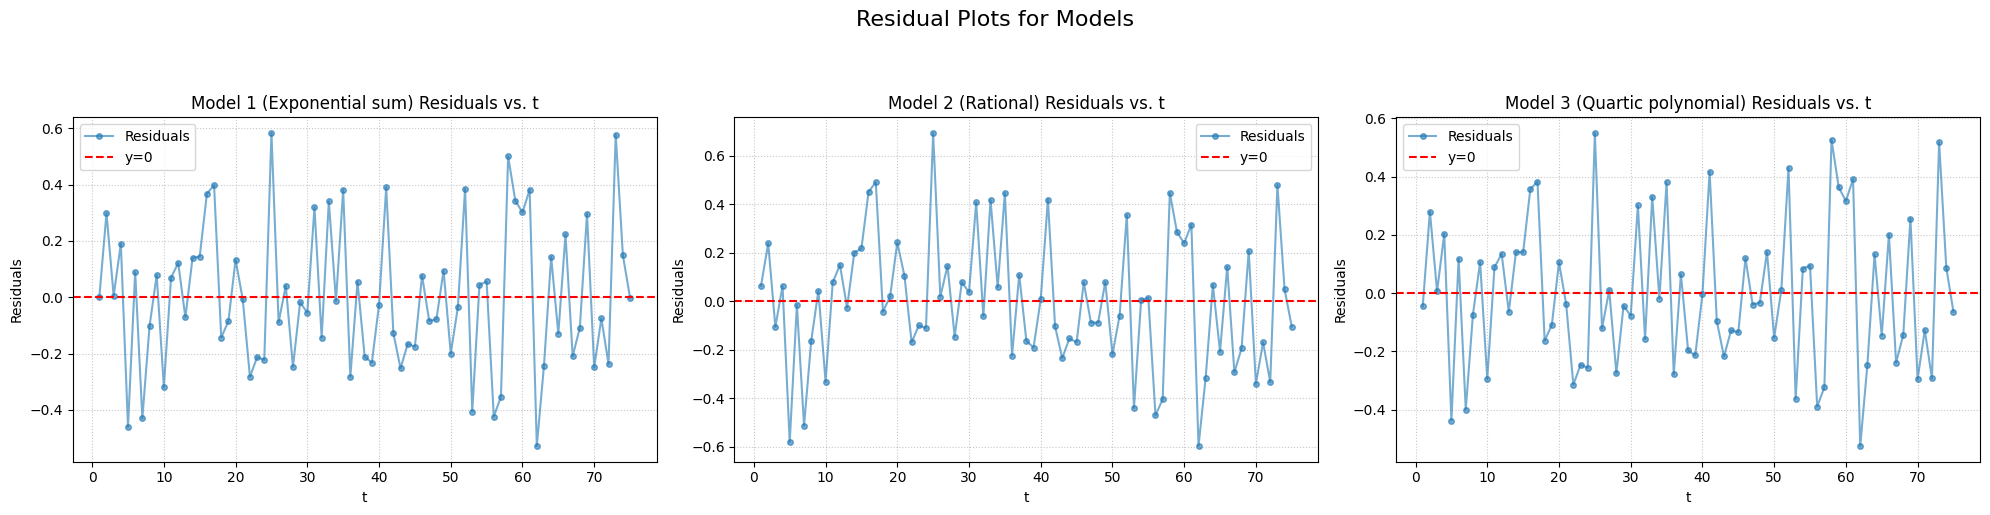

--------

## Question 7: Test whether it satisfies the normality assumption or not?

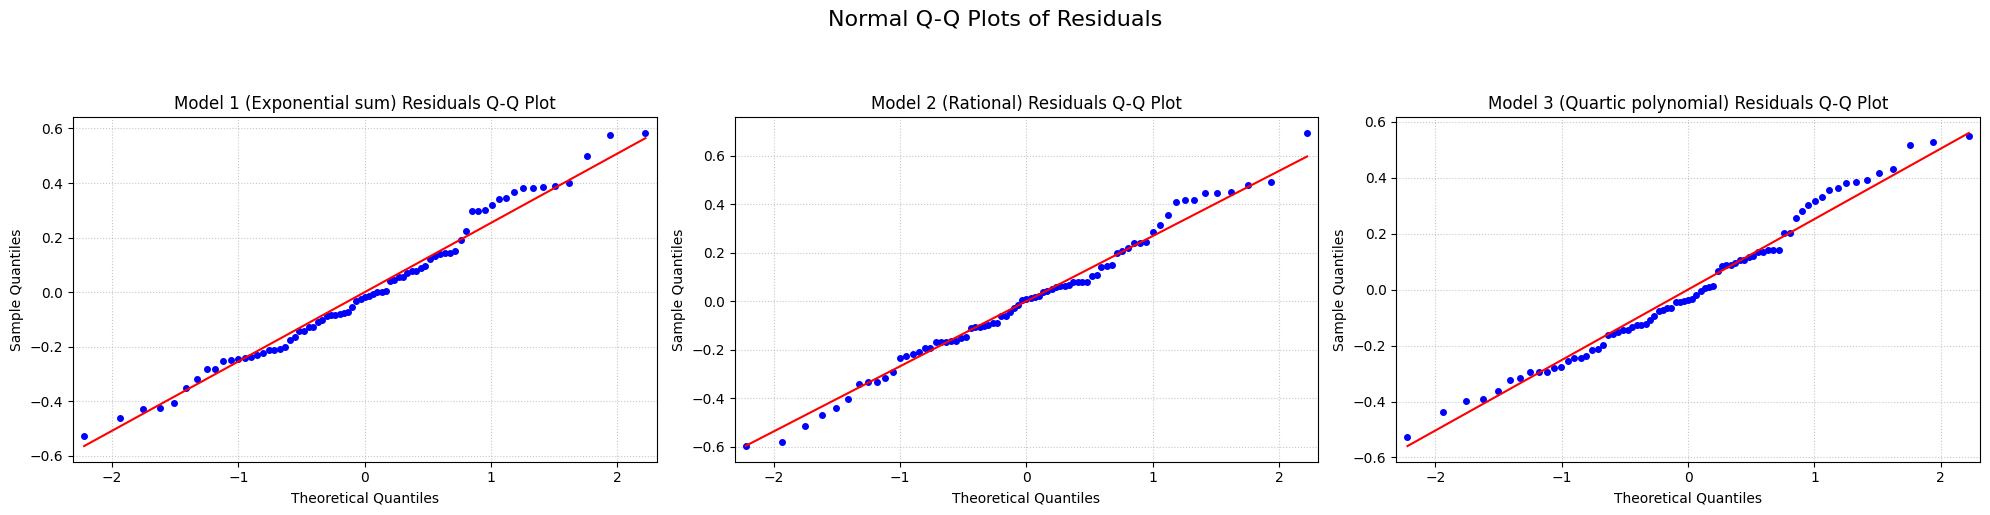

**Test used.** Shapiro–Wilk assesses whether residuals come from a normal distribution.  
- **H₀:** residuals are normal.  
- **H₁:** residuals are not normal.  
Decision rule at α = 0.05: **reject H₀** if p-value < 0.05; otherwise **fail to reject H₀**.

**Results (p-values):**
- Model 1 (exp-sum): **0.270**
- Model 2 (rational): **0.722**
- Model 3 (quartic): **0.207**

**Conclusion.** All three p-values (0.270, 0.722, 0.207) are **greater than 0.05**, so I **fail to reject normality** for the residuals of each model. Among them, Model 2 shows the strongest evidence of normal residuals (largest p-value), but all three models satisfy the normality assumption at the 5% level.


--------

## Question 8: Plot the observed data points and fitted curve.

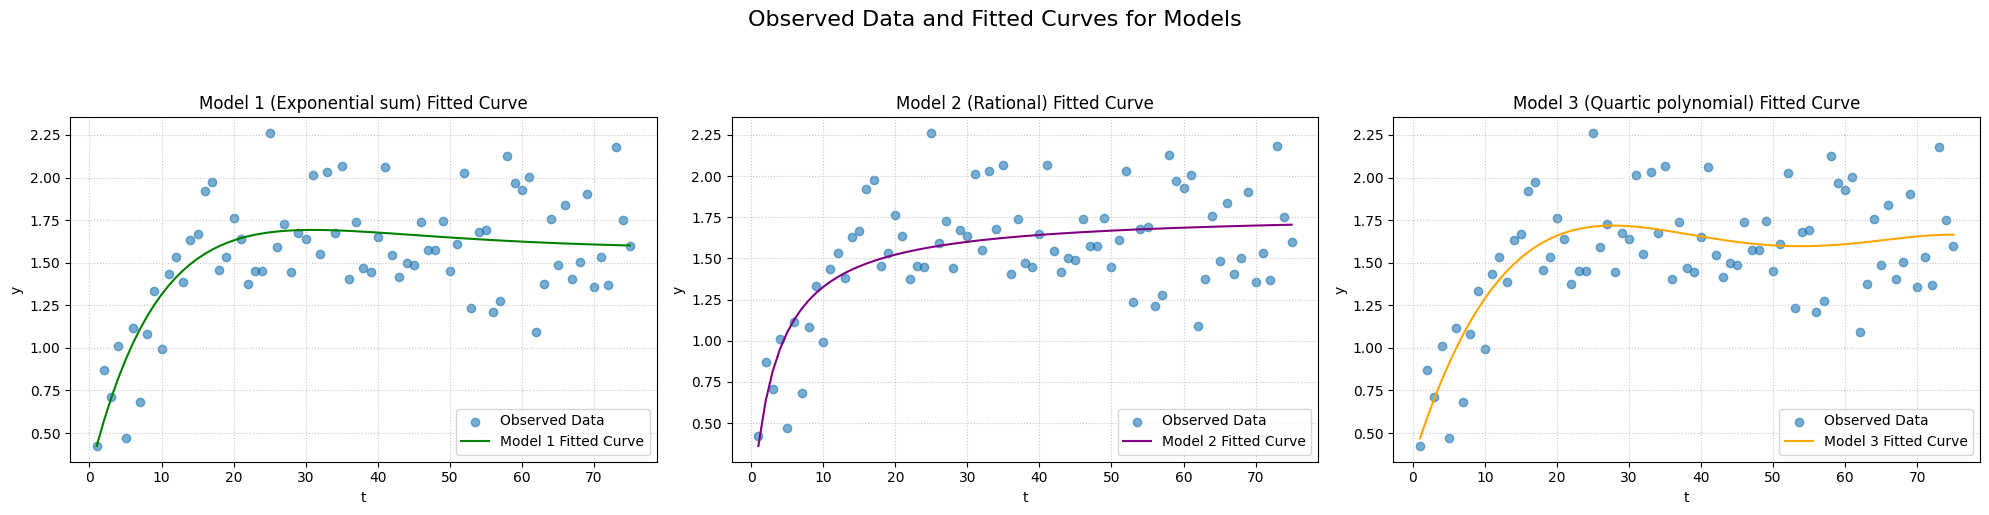